/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  0   1   2   3   4   5   6   7   8   9  10  11  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  52  53  54  55  56  57  82  83
  84  85 111 112 140 168 476 560 644 671 672 673 699 700 701 727 728 729
 730 754 755 756 757 758 759 780 781 782 783] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 20}
Accuracy: 0.9169285714285714
Precision: 0.9158199187191818
Recall: 0.9157543357745105
F1 score: 0.9157009719191842
Confusion matrix:
 [[1293    0    7    1    2    5   28    2    5    0]
 [   0 1565    5   13    2    4    1    2    4    4]
 [   6   22 1258    5   12    9   22   20   22    4]
 [   0    2   30 1271    4   68    8   21   19   10]
 [   4    0    5    7 1138    4   14    5   16  102]
 [  11    6    3   53    7 1142   21    0   15   15]
 [  11    9   19    0    7    9 1318    2   17    4]
 [   4   14   37    1   11    2    1 1405    7   21]
 [   1   11   21   16    7   19   23    9 1226   24]
 [   5    8    6   12  121   17    5   16    9 1221]]


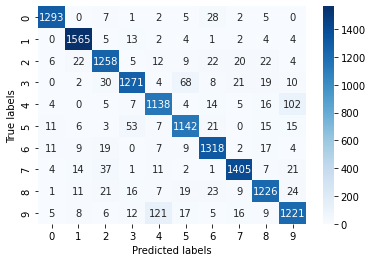

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(np.float32)
y = mnist.target

# Feature selection
selector = SelectKBest(f_classif, k=100)
X = selector.fit_transform(X, y)

# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# # Apply grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Apply parameter search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': range(2, 15),
    'min_samples_leaf': range(1, 5),
    'max_features': ['sqrt', 'log2', None]
}
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

# Train the random forest classifier with the best hyperparameters
rf = RandomForestClassifier(**random_search.best_params_, random_state=42)
rf.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf.predict(X_test)

# Evaluate the performance of the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize a decision tree in the random forest
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

tree = rf.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, feature_names=selector.get_support(indices=True), filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image

import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
